## Introduction

China economy is ranked as the second largest economy in the world by nominal GDP. It is a market with vast opportunities to tap on for expanding businesses, in the case one of our focus group whom manages one of the most popular fast food restaurants in Europe is looking to expand their business into Asia.

Our client is eager to explore expanding their business through franchising into China, however their modus operandi had always been focused in Europe and Asia is an unchartered territory for them. China consist of almost 686 cities across the country with a population of almost 1.4 billion people. 

There is certainly growth opportunities to introduce this fast food brand into Asia with the first step into China.


## Business Problem

As mentioned in the background introduction, our client does not have good understanding of the population landscape in China. In order to successfully sell and launch a franchising model in China, location is the key to success. 

## Data

## 1. China’s Economy

#### This section will require us to identify cities with the highest GDP per capita to filter suitable locations to start the business

We begin by scrapping data using beautifulsoup into a Pandas dataframe. 
Website: https://en.wikipedia.org/wiki/List_of_Chinese_prefecture-level_cities_by_GDP_per_capita

First, we import required libraries

In [1]:
# Install BeautifulSoup
!conda install -c conda-forge beautifulsoup4 --yes

Solving environment: done

# All requested packages already installed.



In [2]:
from bs4 import BeautifulSoup
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import urllib.request #import library to use to read URLs
import requests

Scrap data from wikipedia website

In [3]:
#specify URL to scrap
url = requests.get("https://en.wikipedia.org/wiki/List_of_Chinese_prefecture-level_cities_by_GDP_per_capita").text

soup = BeautifulSoup(url, "html.parser")
My_table = soup.find('table', class_='sortable wikitable')

In [4]:
# Put them into tables
A=[]
B=[]
C=[]
D=[]
E=[]
F=[]
G=[]

for row in My_table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==7:
        A.append(cells[0].find(text=True))
        B.append(cells[1].find(text=True))
        C.append(cells[2].find(text=True))
        D.append(cells[3].find(text=True))
        E.append(cells[4].find(text=True))
        F.append(cells[5].find(text=True))
        G.append(cells[6].find(text=True))

Create a DataFrame with the information

In [5]:
df = pd.DataFrame(A, columns=['Rank'])
df['cities'] = B
df['provinces'] = C
df['GDPpc (CNY)'] = D
df['GDPpc (USD)'] = E
df['GDP (CNY)'] = F
df['GDP (USD)'] = G
df.head()

,Rank,cities,provinces,GDPpc (CNY),GDPpc (USD),GDP (CNY),GDP (USD)
0,None,Macau,Macau,"522,691","77,415","341,364","50,559\n"
1,None,Hong Kong,Hong Kong,"311,197","46,091","2,306,948","341,679\n"
2,1,Shenzhen,Guangdong,"183,544","27,184","2,249,006","333,097\n"
3,2,Dongying,Shandong,"177,962","26,358","381,435","56,494\n"
4,3,Ordos,Inner mongolia,"173,609","25,713","357,981","53,020\n"


Drop unnecessary columns

In [6]:
#Drop columns provinces, GDPpc(USD), GDP(USD)
df = df.drop(columns=['provinces', 'GDPpc (USD)', 'GDP (USD)'])
df.head()

,Rank,cities,GDPpc (CNY),GDP (CNY)
0,None,Macau,"522,691","341,364"
1,None,Hong Kong,"311,197","2,306,948"
2,1,Shenzhen,"183,544","2,249,006"
3,2,Dongying,"177,962","381,435"
4,3,Ordos,"173,609","357,981"


What is the shape of our dataframe?

In [7]:
df.shape

(85, 4)

Visualize GDPpc rank by using bar charts

In [8]:
#Set index as cities
df.set_index('cities', inplace = True)

#view our new dataframe
df.head()

,Rank,GDPpc (CNY),GDP (CNY)
cities,,,
Macau,None,"522,691","341,364"
Hong Kong,None,"311,197","2,306,948"
Shenzhen,1,"183,544","2,249,006"
Dongying,2,"177,962","381,435"
Ordos,3,"173,609","357,981"


In [9]:
#Remove all commas from the numbers
df['GDPpc (CNY)'] = df['GDPpc (CNY)'].str.replace(',', '')
df['GDP (CNY)'] = df['GDP (CNY)'].str.replace(',', '')
df['GDPpc (CNY)']=df['GDPpc (CNY)'].astype(float)

In [10]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

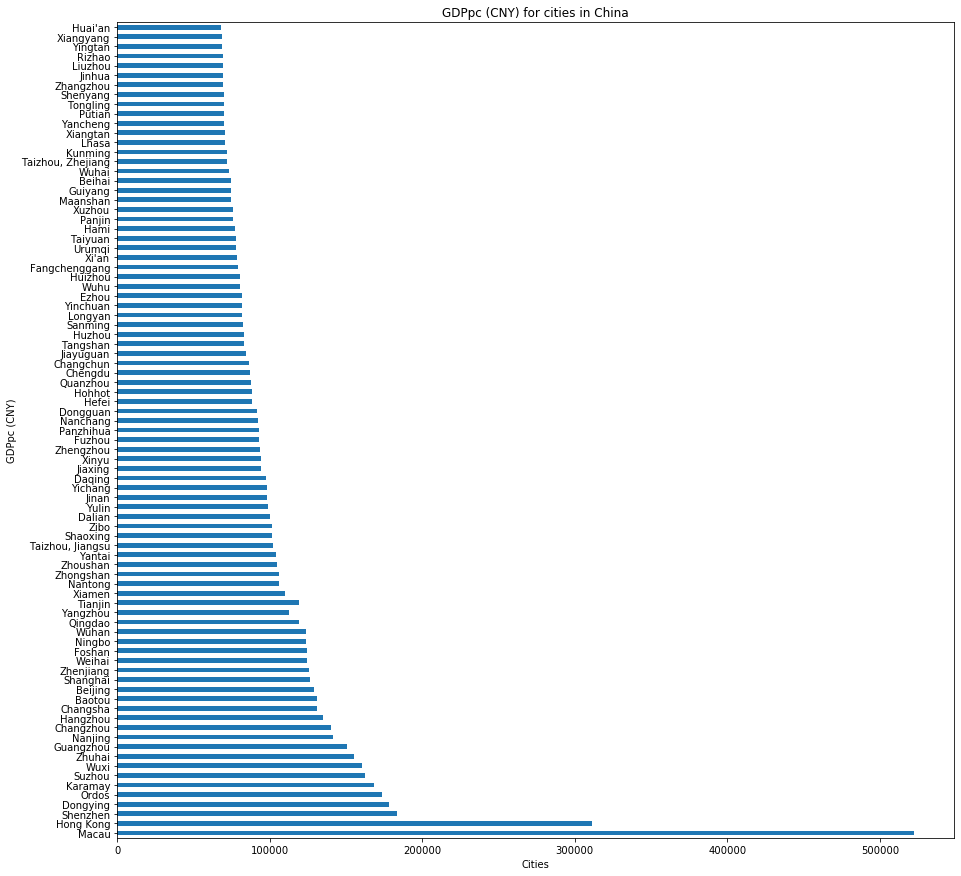

In [11]:
df['GDPpc (CNY)'].plot(kind='barh', figsize=(15, 15))

plt.title('GDPpc (CNY) for cities in China') # add a title to the bar chart
plt.ylabel('GDPpc (CNY)') # add y-label
plt.xlabel('Cities') # add x-label

plt.show()

We can see that the top 3 locations with highest GDPpc is Macau, Hong Kong, and Shenzhen. However for the purpose of this study, we will only focus on mainlain China which gives Shenzhen, Dongying, and Ordos.

## Define Foursquare Credentials and Version

In [12]:
CLIENT_ID = 'ADXZQUNM0FBD5O3JWD5U1X0AL24DKAVUVDHVGDBHSSL02SVM' # your Foursquare ID
CLIENT_SECRET = 'GJBXCKZZNZKB5YQ2WGNHSYEWTD43Y3WOALEL50UEKCJHHN3H' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ADXZQUNM0FBD5O3JWD5U1X0AL24DKAVUVDHVGDBHSSL02SVM
CLIENT_SECRET:GJBXCKZZNZKB5YQ2WGNHSYEWTD43Y3WOALEL50UEKCJHHN3H


#### Use geopy library to get the latitude and longitude values of these Cities.

Import and install required libraries

In [13]:
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

Solving environment: done

# All requested packages already installed.



In [14]:
address = 'SHENZHEN'

geolocator = Nominatim(user_agent="bryanlimql88@gmail.com")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('The geograpical coordinate of Shenzhen are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Shenzhen are 22.555454, 114.0543297.


Lets take a quick look at the city of Shenzhen on a map

In [15]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

Solving environment: done

# All requested packages already installed.



In [16]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=9) # generate map centred around Shenzhen

# display map
venues_map

## Extracting districts data in Shenzhen Province, there are total of 9 districts

In [17]:
#specify URL to scrap
url = requests.get("https://en.wikipedia.org/wiki/List_of_administrative_divisions_of_Shenzhen#County-level_divisions").text

soup = BeautifulSoup(url, "html.parser")

In [18]:
My_table = soup.find('table')

In [19]:
# Put them into tables
A=[]
B=[]
C=[]
D=[]
E=[]
G=[]

for row in My_table.findAll('tr')[1:]:
    cells=row.findAll('td')
    if len(cells)==6:
        A.append(cells[0].find(text=True))
        B.append(cells[1].find(text=True))
        C.append(cells[2].find(text=True))
        D.append(cells[3].find(text=True))
        E.append(cells[4].find(text=True))
        F.append(cells[5].find(text=True))
        G.append(cells[5].find(text=True))

In [20]:
df = pd.DataFrame(A, columns=['Name'])
df['Chinese'] = B
df['Hanyu'] = C
df['Population'] = D
df['Area (km2)'] = E
df

,Name,Chinese,Hanyu,Population,Area (km2)
0,Luohu District,罗湖区\n,Luóhú Qū\n,"923,423\n",79\n
1,Nanshan District,南山区\n,Nánshān Qū\n,"1,087,936\n",182\n
2,Yantian District,盐田区\n,Yántián Qū\n,"208,861\n",72\n
3,Bao'an District,宝安区\n,Bǎo'ān Qū\n,"2,638,807\n",402\n
4,Longgang District,龙岗区\n,Lónggǎng Qū\n,"1,831,225\n",382\n
5,Pingshan District,坪山区\n,Píngshān Qū\n,"309,211\n",168\n
6,Longhua District,龙华区\n,Lónghuá Qū\n,"1,379,000\n",175\n
7,Guangming District,光明区\n,Guāngmíng Qū\n,"481,420\n",156\n
8,Dapeng New District,大鹏新区\n,Dàpéng Xīn Qū\n,"180,000\n",294\n


In [21]:
#Remove all \n from the numbers
df['Chinese'] = df['Chinese'].str.replace('\n', '')
df['Hanyu'] = df['Hanyu'].str.replace('\n', '')
df['Population'] = df['Population'].str.replace('\n', '')
df['Population'] = df['Population'].str.replace(',', '')
df['Area (km2)'] = df['Area (km2)'].str.replace('\n', '')
df['Area (km2)'] = df['Area (km2)'].str.replace(',', '')
df['Population']=df['Population'].astype(float)
df['Area (km2)']=df['Area (km2)'].astype(float)
df

,Name,Chinese,Hanyu,Population,Area (km2)
0,Luohu District,罗湖区,Luóhú Qū,923423.0,79.0
1,Nanshan District,南山区,Nánshān Qū,1087936.0,182.0
2,Yantian District,盐田区,Yántián Qū,208861.0,72.0
3,Bao'an District,宝安区,Bǎo'ān Qū,2638807.0,402.0
4,Longgang District,龙岗区,Lónggǎng Qū,1831225.0,382.0
5,Pingshan District,坪山区,Píngshān Qū,309211.0,168.0
6,Longhua District,龙华区,Lónghuá Qū,1379000.0,175.0
7,Guangming District,光明区,Guāngmíng Qū,481420.0,156.0
8,Dapeng New District,大鹏新区,Dàpéng Xīn Qū,180000.0,294.0


In [22]:
df.set_index('Name', inplace=True)

In [23]:
df

,Chinese,Hanyu,Population,Area (km2)
Name,,,,
Luohu District,罗湖区,Luóhú Qū,923423.0,79.0
Nanshan District,南山区,Nánshān Qū,1087936.0,182.0
Yantian District,盐田区,Yántián Qū,208861.0,72.0
Bao'an District,宝安区,Bǎo'ān Qū,2638807.0,402.0
Longgang District,龙岗区,Lónggǎng Qū,1831225.0,382.0
Pingshan District,坪山区,Píngshān Qū,309211.0,168.0
Longhua District,龙华区,Lónghuá Qū,1379000.0,175.0
Guangming District,光明区,Guāngmíng Qū,481420.0,156.0
Dapeng New District,大鹏新区,Dàpéng Xīn Qū,180000.0,294.0


Let's use simple K-means clustering to cluster the districts

In [24]:
from sklearn.cluster import KMeans 

x1 = df['Population']
x2 = df['Area (km2)']

#### Define a function that assigns each datapoint to a cluster

In [38]:
colors_map = np.array(['b', 'r'])
def assign_members(x1, x2, centers):
    compare_to_first_center = np.sqrt(np.square(np.array(x1) - centers[0][0]) + np.square(np.array(x2) - centers[0][1]))
    compare_to_second_center = np.sqrt(np.square(np.array(x1) - centers[1][0]) + np.square(np.array(x2) - centers[1][1]))
    class_of_points = compare_to_first_center > compare_to_second_center
    colors = colors_map[class_of_points + 1 - 1]
    return colors, class_of_points

print('assign_members function defined!')

assign_members function defined!


#### Define a function that updates the centroid of each cluster

In [48]:
# update means
def update_centers(x1, x2, class_of_points):
    center1 = [np.mean(np.array(x1)[~class_of_points]), np.mean(np.array(x2)[~class_of_points])]
    center2 = [np.mean(np.array(x1)[class_of_points]), np.mean(np.array(x2)[class_of_points])]
    return [center1, center2]

print('assign_members function defined!')

assign_members function defined!


#### Define a function that plots the data points along with the cluster centroids

In [49]:
def plot_points(centroids=None, colors='g', figure_title=None):
    # plot the figure
    fig = plt.figure(figsize=(15, 10))  # create a figure object
    ax = fig.add_subplot(1, 1, 1)
    
    centroid_colors = ['bx', 'rx']
    if centroids:
        for (i, centroid) in enumerate(centroids):
            ax.plot(centroid[0], centroid[1], centroid_colors[i], markeredgewidth=5, markersize=20)
    plt.scatter(x1, x2, s=500, c=colors)
    
    ax.tick_params('both', length=2, width=1, which='major', labelsize=15)
    
    # add labels to axes
    ax.set_xlabel('Population', fontsize=20)
    ax.set_ylabel('Area', fontsize=20)
    
    # add title to figure
    ax.set_title(figure_title, fontsize=24)

    plt.show()

print('plot_points function defined!')

plot_points function defined!


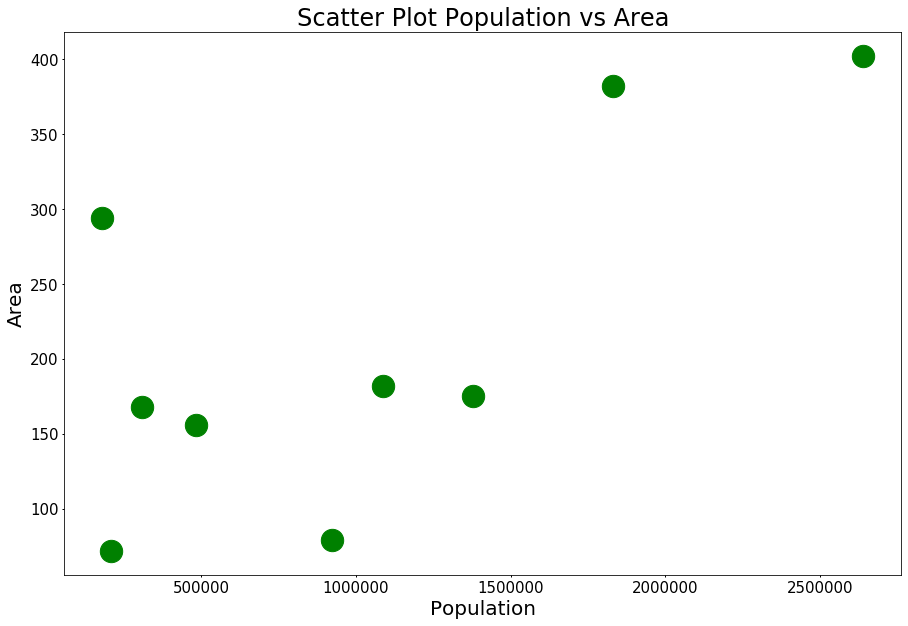

In [50]:
plot_points(figure_title='Scatter Plot Population vs Area')

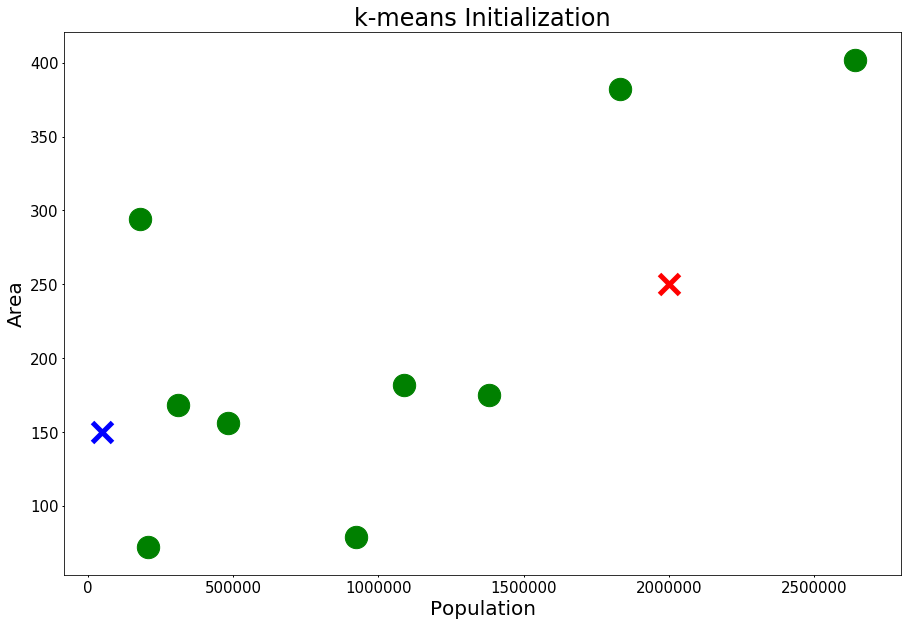

In [51]:
centers = [[50000, 150], [2000000, 250]]
plot_points(centers, figure_title='k-means Initialization')

Iteration 1 - Press Enter to update the members of each cluster 


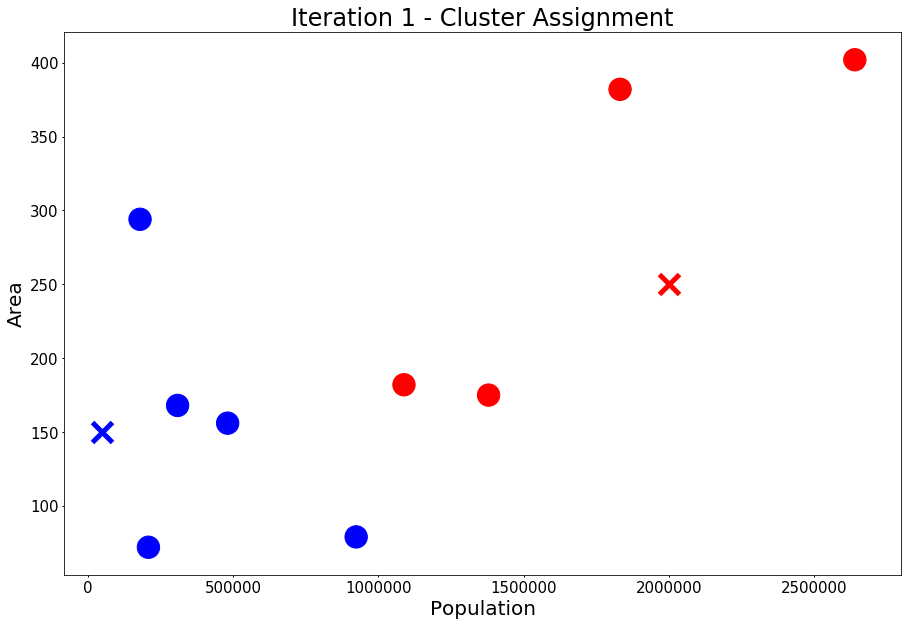

Iteration 1 - Press Enter to update the centers 


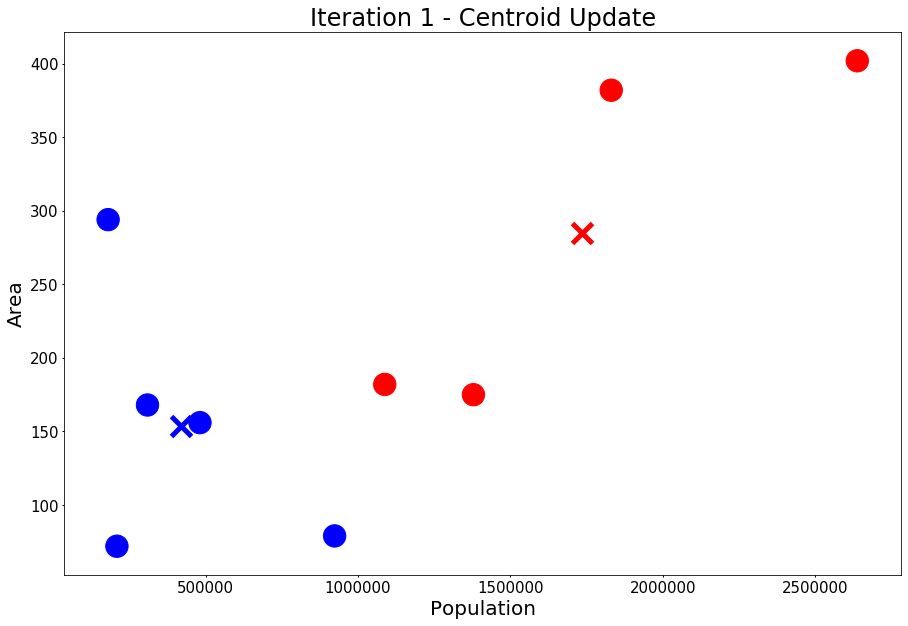

Iteration 2 - Press Enter to update the members of each cluster 


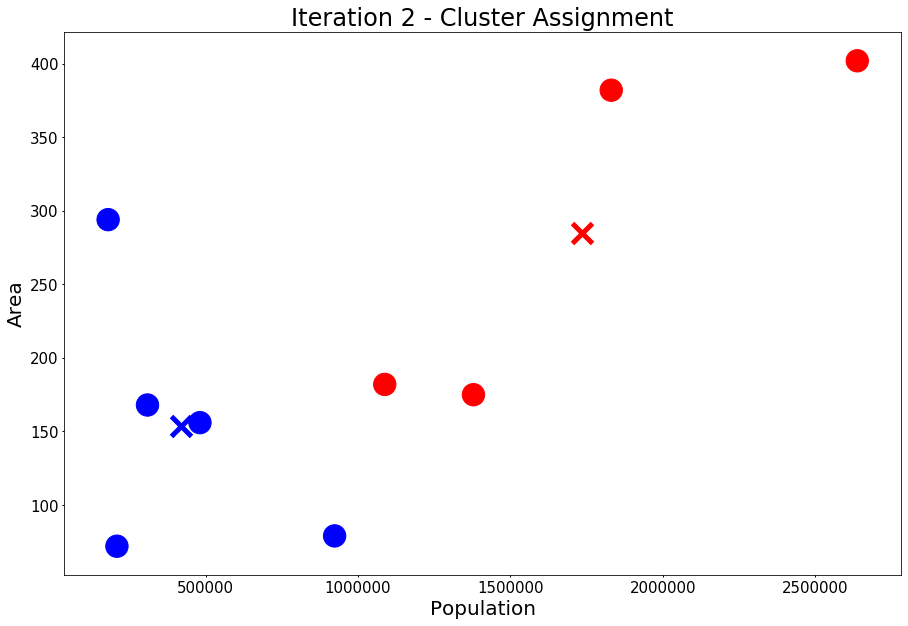

Iteration 2 - Press Enter to update the centers 


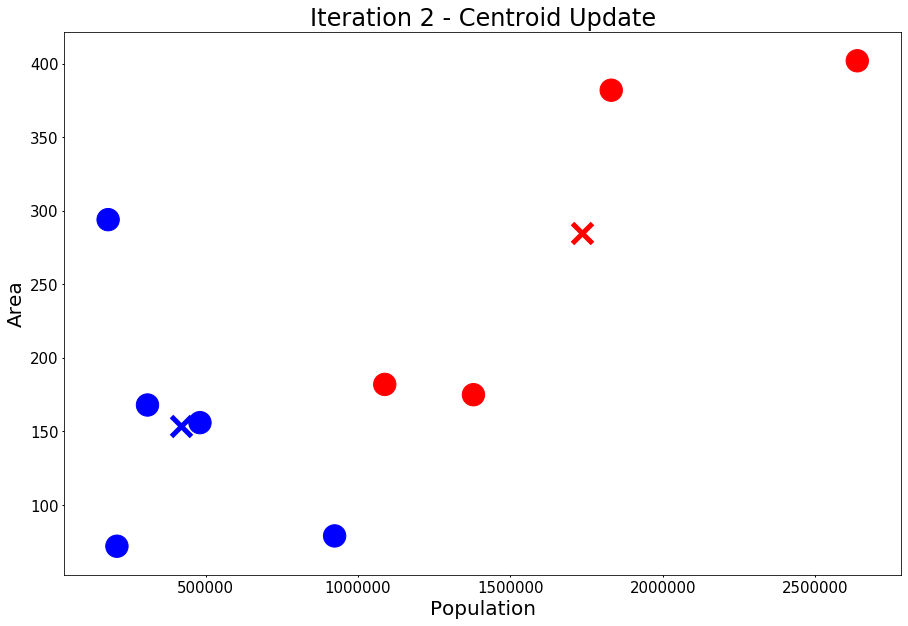

In [52]:
number_of_iterations = 2
for i in range(number_of_iterations):
    input('Iteration {} - Press Enter to update the members of each cluster'.format(i + 1))
    colors, class_of_points = assign_members(x1, x2, centers)
    title = 'Iteration {} - Cluster Assignment'.format(i + 1)
    plot_points(centers, colors, figure_title=title)
    input('Iteration {} - Press Enter to update the centers'.format(i + 1))
    centers = update_centers(x1, x2, class_of_points)
    title = 'Iteration {} - Centroid Update'.format(i + 1)
    plot_points(centers, colors, figure_title=title)

Defining 2 obvious cluster categories,
Blue – small area with low population
Red – Large area with high population
In this case it is advisable to be selected provinces within the red clusters. We will be selected Longgang district for our exercise.

## 1. Search for a specific venue category

In [94]:
#Locate Longgang district
address = 'LONGGANG DISTRICT'

geolocator = Nominatim(user_agent="bryanlimql88@gmail.com")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('The geograpical coordinate of LONGGANG are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of LONGGANG are 22.7230369, 114.2426561.


In [129]:
radius = 20000
LIMIT = 500
print(search_query + ' .... OK!')

Fast Food .... OK!


In [130]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=ADXZQUNM0FBD5O3JWD5U1X0AL24DKAVUVDHVGDBHSSL02SVM&client_secret=GJBXCKZZNZKB5YQ2WGNHSYEWTD43Y3WOALEL50UEKCJHHN3H&ll=22.7230369,114.2426561&v=20180604&radius=20000&limit=500'

In [173]:
results = requests.get(url).json()

In [132]:
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.city,location.state,location.country,location.formattedAddress,location.crossStreet,location.postalCode,location.neighborhood
0,51dfae05498e21755ce7426e,Longgang Library (龙岗图书馆),"[{'id': '4bf58dd8d48988d12f941735', 'name': 'L...",v-1591342498,False,龙岗区中心城文化中心D座,22.722238,114.245560,"[{'label': 'display', 'lat': 22.72223775324083...",311,CN,深圳市,广东,中国,"[龙岗区中心城文化中心D座, 深圳市, 广东, 中国]",NaN,NaN,NaN
1,4f001d6ea69d45461de11862,世茂百货 World Trade Department Store,"[{'id': '4bf58dd8d48988d1f6941735', 'name': 'D...",v-1591342498,False,龙翔大街 Longxiang Ave,22.719586,114.241376,"[{'label': 'display', 'lat': 22.71958613352482...",406,CN,龙岗,广东,中国,"[龙翔大街 Longxiang Ave, 龙岗, 广东, 中国]",NaN,NaN,NaN
2,56cac560498e4bcc8ac3280a,深圳龙岗公安分局出入境管理大厅,"[{'id': '4bf58dd8d48988d12e941735', 'name': 'P...",v-1591342498,False,NaN,22.720527,114.239671,"[{'label': 'display', 'lat': 22.720527, 'lng':...",414,CN,深圳市,广东,中国,"[深圳市, 广东, 中国]",NaN,NaN,NaN
3,4cc7db54f2d437047535cb6c,吉祥中路,"[{'id': '4bf58dd8d48988d164941735', 'name': 'P...",v-1591342498,False,吉祥中路,22.716531,114.236591,"[{'label': 'display', 'lat': 22.7165314766769,...",955,CN,深圳市,广东,中国,"[吉祥中路, 深圳市, 广东, 中国]",NaN,NaN,NaN
4,4c233ee2fbe5c9b6cd129b21,Changsha Railway Station (长沙站),"[{'id': '4bf58dd8d48988d129951735', 'name': 'T...",v-1591342498,False,车站中路406号,28.197340,113.008068,"[{'label': 'display', 'lat': 28.19734, 'lng': ...",621882,CN,長沙,湖南,中国,"[车站中路406号 (五一大道口), 長沙, 湖南, 410001, 中国]",五一大道口,410001,NaN


#### Define information of interest and filter dataframe

In [133]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,lat,lng,labeledLatLngs,distance,cc,city,state,country,formattedAddress,crossStreet,postalCode,neighborhood,id
0,Longgang Library (龙岗图书馆),Library,龙岗区中心城文化中心D座,22.722238,114.245560,"[{'label': 'display', 'lat': 22.72223775324083...",311,CN,深圳市,广东,中国,"[龙岗区中心城文化中心D座, 深圳市, 广东, 中国]",NaN,NaN,NaN,51dfae05498e21755ce7426e
1,世茂百货 World Trade Department Store,Department Store,龙翔大街 Longxiang Ave,22.719586,114.241376,"[{'label': 'display', 'lat': 22.71958613352482...",406,CN,龙岗,广东,中国,"[龙翔大街 Longxiang Ave, 龙岗, 广东, 中国]",NaN,NaN,NaN,4f001d6ea69d45461de11862
2,深圳龙岗公安分局出入境管理大厅,Police Station,NaN,22.720527,114.239671,"[{'label': 'display', 'lat': 22.720527, 'lng':...",414,CN,深圳市,广东,中国,"[深圳市, 广东, 中国]",NaN,NaN,NaN,56cac560498e4bcc8ac3280a
3,吉祥中路,Plaza,吉祥中路,22.716531,114.236591,"[{'label': 'display', 'lat': 22.7165314766769,...",955,CN,深圳市,广东,中国,"[吉祥中路, 深圳市, 广东, 中国]",NaN,NaN,NaN,4cc7db54f2d437047535cb6c
4,Changsha Railway Station (长沙站),Train Station,车站中路406号,28.197340,113.008068,"[{'label': 'display', 'lat': 28.19734, 'lng': ...",621882,CN,長沙,湖南,中国,"[车站中路406号 (五一大道口), 長沙, 湖南, 410001, 中国]",五一大道口,410001,NaN,4c233ee2fbe5c9b6cd129b21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,老西安,Shaanxi Restaurant,NaN,22.716910,114.238041,"[{'label': 'display', 'lat': 22.71691, 'lng': ...",830,CN,NaN,NaN,中国,[中国],NaN,NaN,NaN,536e089e498e3f089fc264c6
123,Cafe 2011,Breakfast Spot,Lobby at Crown Plaza,22.726000,114.245693,"[{'label': 'display', 'lat': 22.72600043545933...",453,CN,NaN,NaN,中国,"[Lobby at Crown Plaza, 中国]",NaN,NaN,NaN,54f12a21498e31ed2e4d3ad0
124,Xiao Mian Lao (小面捞),Szechuan Restaurant,NaN,22.717620,114.238585,"[{'label': 'display', 'lat': 22.71762, 'lng': ...",733,CN,NaN,NaN,中国,[中国],NaN,NaN,NaN,57010a69498e0dfad3e56be4
125,歌巢KTV,Karaoke Bar,NaN,22.725994,114.245664,"[{'label': 'display', 'lat': 22.72599419922690...",451,CN,NaN,NaN,中国,[中国],NaN,NaN,NaN,4f1ebc38e4b03f6d8ebe52e0


## Explore Neighborhoods in Longgang District

Group each categories

In [139]:
df_grouped = dataframe_filtered.groupby('categories').count().reset_index()
df_grouped[['categories', 'name']]

,categories,name
0,Arcade,1
1,Asian Restaurant,1
2,BBQ Joint,1
3,Badminton Court,1
4,Bakery,2
...,...,...
70,Town Hall,1
71,Toy / Game Store,1
72,Train Station,1
73,Wine Bar,1


Which are the most famous venues in Longgang?

In [145]:
df_grouped1 = df_grouped[['categories', 'name']].sort_values('name', ascending=False)
df_grouped1.head(10)

,categories,name
14,Chinese Restaurant,9
11,Café,5
27,Government Building,4
13,Cantonese Restaurant,4
67,Sushi Restaurant,4
10,Bubble Tea Shop,4
16,Coffee Shop,3
39,Karaoke Bar,3
64,Shopping Mall,3
29,Gym,3


#### As we can see, the top dining cusines are mostly asian and introducing a European fast food in Longgang district may be a fresh idea to the locals.

Filter original list down to only top categories

In [169]:
filter_list = ['Chinese Restaurant', 'Bubble Tea Shop', 'Cantonese Restaurant', 'Café', 'Sushi Restaurant', 'Coffee Shop']
df_filtered = dataframe_filtered[dataframe_filtered.categories.isin(filter_list)]
df_filtered = df_filtered[['name', 'categories', 'lat', 'lng']]
df_filtered.head()

,name,categories,lat,lng
9,一点点,Bubble Tea Shop,22.721095,114.241991
16,瑞幸咖啡,Café,22.722529,114.249876
23,Gong Cha (贡茶),Bubble Tea Shop,22.727244,114.245310
24,九贺割烹料理,Sushi Restaurant,22.724373,114.250281
25,夜郎國,Chinese Restaurant,22.723206,114.238882


In [172]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centred around the Conrad Hotel

for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map